In [302]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [265]:
def process_adata(adata):
    # Reset index
    adata_tmp = adata.reset_index()
    index = adata_tmp["index"]
    pathway_gene = []
    # Average out the cell line axis 
    for pert in index: 
        _, pathway, gene = pert.split("_")
        pathway_gene.append(f"{pathway}_{gene}")
    adata_tmp = adata_tmp.drop("index", axis=1)
    # adata_tmp["cell_line"] = cell_lines
    adata_tmp["pathway_gene"] = pathway_gene
    return adata_tmp

In [266]:
np.random.seed(42)

In [267]:
dataset_path = Path("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_gene/")

In [268]:
metrics0 = pd.read_csv(dataset_path / "split0" / "identity_ood_metrics_deg_split_0.csv", index_col=0).T 
metrics1 = pd.read_csv(dataset_path / "split1" / "identity_ood_metrics_deg_split_1.csv", index_col=0).T
metrics2 = pd.read_csv(dataset_path / "split2" / "identity_ood_metrics_deg_split_2.csv", index_col=0).T
metrics3 = pd.read_csv(dataset_path / "split3" / "identity_ood_metrics_deg_split_3.csv", index_col=0).T

# Average out cell line
metrics0 = process_adata(metrics0).groupby(["pathway_gene"]).mean()
metrics1 = process_adata(metrics1).groupby(["pathway_gene"]).mean()
metrics2 = process_adata(metrics2).groupby(["pathway_gene"]).mean()
metrics3 = process_adata(metrics3).groupby(["pathway_gene"]).mean()

In [269]:
sorted_metrics0 = metrics0.sort_values(by="r_squared")

In [270]:
sorted_metrics1 = metrics1.sort_values(by="r_squared")

In [271]:
sorted_metrics2 = metrics2.sort_values(by="r_squared")

In [272]:
sorted_metrics3 = metrics3.sort_values(by="r_squared")

In [273]:
sorted_metrics0

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
pathway_gene,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749
...,...,...,...,...,...,...
IFNB_TRAFD1,0.929190,2.950087,0.554126,0.492205,0.975346,0.009415
TNFA_TNFRSF1B,0.930224,4.958735,0.723873,0.653202,1.298039,0.009011
IFNB_AKT1,0.930974,5.887419,0.911582,0.805093,1.597218,0.013499


In [274]:
sorted_metrics1

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
pathway_gene,,,,,,
INS_TTF2,-662.670035,4.557100,0.833169,0.677365,1.334200,0.052580
TGFB_IKBKB,-42.221962,0.575064,0.414651,0.402011,0.801208,0.194823
IFNG_ZNFX1,-32.062675,0.662145,0.441093,0.419360,0.833898,0.168782
INS_COPS4,-15.209177,6.689275,1.353672,1.114583,2.202414,0.043029
IFNG_RARRES3,-11.625917,3.811362,0.689724,0.578239,1.146840,0.054196
...,...,...,...,...,...,...
TGFB_SMAD6,0.937350,5.300558,0.555695,0.477134,0.946419,0.010276
IFNB_RAP1GAP,0.938886,5.106167,0.474439,0.411484,0.815196,0.006859
TGFB_PIK3CA,0.948734,0.801187,0.454425,0.438937,0.874654,0.049687


In [275]:
sorted_metrics2

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
pathway_gene,,,,,,
IFNG_SP110,-992.615617,0.225767,0.122792,0.116870,0.232579,0.081801
TNFA_DNM1L,-359.913211,0.227244,0.151201,0.144471,0.287596,0.075215
INS_EIF2B1,-191.725817,10.095337,1.722386,1.305239,2.566428,0.039160
TGFB_PPP2CA,-123.815707,0.678690,0.312182,0.298719,0.594824,0.088239
TNFA_FOS,-41.605602,0.082164,0.046802,0.044228,0.087732,0.043784
...,...,...,...,...,...,...
IFNG_RNF14,0.913250,10.161773,1.480064,1.210453,2.394384,0.012417
TGFB_SMAD9,0.931051,3.728326,0.574609,0.517523,1.026660,0.010763
TNFA_NFKBIA,0.960779,7.273219,0.794800,0.567026,1.120373,0.007316


In [276]:
sorted_metrics3

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
pathway_gene,,,,,,
INS_POLR2L,-616.790447,2.795095,1.209149,1.134536,2.257788,0.033826
TNFA_CASP10,-110.781948,0.242289,0.175543,0.170588,0.340180,0.121347
IFNG_CUL1,-68.399726,14.565378,4.305053,3.474773,6.871669,0.026508
IFNG_ZNF267,-6.487432,0.155026,0.058271,0.054502,0.108249,0.079402
IFNB_IFNAR1,-3.925798,25.418087,15.227182,14.318138,28.540567,0.118154
...,...,...,...,...,...,...
IFNB_DTX3L,0.906537,11.092487,1.301361,1.062843,2.107233,0.009627
TNFA_CREB1,0.911799,9.858352,1.137585,0.911429,1.802384,0.009310
TGFB_EP300,0.916623,3.434990,0.859869,0.787544,1.566093,0.023474


## Stack the perts on top of each other 

In [277]:
sorted_metrics0["split"] = "split_0"
sorted_metrics1["split"] = "split_1"
sorted_metrics2["split"] = "split_2"
sorted_metrics3["split"] = "split_3"

In [278]:
sorted_metrics_stack = pd.concat([sorted_metrics0, 
                                  sorted_metrics1,
                                  sorted_metrics2,
                                  sorted_metrics3,
                                 ], axis=0)

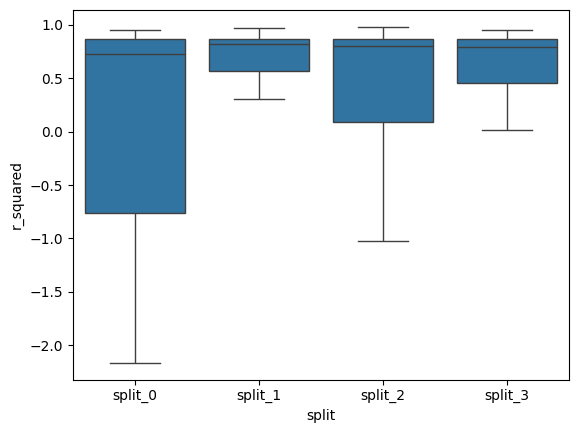

In [279]:
sns.boxplot(sorted_metrics_stack, x="split", y="r_squared", showfliers=False)
plt.show()

In [280]:
sorted_metrics_stack.groupby("split").mean(0)

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
split,,,,,,
split_0,-79.691875,9.263922,2.503057,2.106494,4.174735,0.036797
split_1,-11.757250,7.174725,1.654456,1.389478,2.754127,0.033486
split_2,-27.628411,9.512785,2.751268,2.399929,4.768092,0.031314
split_3,-12.539363,9.834265,2.858297,2.432620,4.825266,0.033051


In [281]:
sorted_metrics_stack

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,split
pathway_gene,,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204,split_0
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912,split_0
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451,split_0
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335,split_0
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749,split_0
...,...,...,...,...,...,...,...
IFNB_DTX3L,0.906537,11.092487,1.301361,1.062843,2.107233,0.009627,split_3
TNFA_CREB1,0.911799,9.858352,1.137585,0.911429,1.802384,0.009310,split_3
TGFB_EP300,0.916623,3.434990,0.859869,0.787544,1.566093,0.023474,split_3


## Rethink the splits 

In [282]:
sorted_metrics_stack.head()

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,split
pathway_gene,,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204,split_0
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912,split_0
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451,split_0
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335,split_0
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749,split_0


In [283]:
pathways = []
genes = []

for pert in sorted_metrics_stack.index:
    pathway, gene = pert.split("_")
    pathways.append(pathway)
    genes.append(gene)

In [284]:
sorted_metrics_stack["gene"] = genes
sorted_metrics_stack["pathway"] = pathways

In [285]:
sorted_metrics_stack

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,split,gene,pathway
pathway_gene,,,,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204,split_0,FBXO6,IFNG
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912,split_0,PIK3CA,IFNG
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451,split_0,NFAT5,TNFA
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335,split_0,IFI16,IFNB
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749,split_0,TAPBPL,IFNG
...,...,...,...,...,...,...,...,...,...
IFNB_DTX3L,0.906537,11.092487,1.301361,1.062843,2.107233,0.009627,split_3,DTX3L,IFNB
TNFA_CREB1,0.911799,9.858352,1.137585,0.911429,1.802384,0.009310,split_3,CREB1,TNFA
TGFB_EP300,0.916623,3.434990,0.859869,0.787544,1.566093,0.023474,split_3,EP300,TGFB


In [286]:
pathway_splits = {}

# Subset to pathway of interest 
for pathway in sorted_metrics_stack.pathway.unique():
    sorted_metrics_stack_pathway = sorted_metrics_stack[sorted_metrics_stack.pathway==pathway]
    sorted_metrics_stack_pathway = sorted_metrics_stack_pathway.sort_values(by="r_squared")
    pathway_splits[pathway] = [[], [], [],  []]
    # Index of the sorted cells
    sorted_perts_pathway = sorted_metrics_stack_pathway.index
    sorted_perts_pathway_splits = np.array_split(sorted_perts_pathway, 4)
    for split in sorted_perts_pathway_splits:
        split = np.array(split)
        np.random.shuffle(split)
        groups = np.array_split(split, 4)
        for i in range(4):
            pathway_splits[pathway][i] += list(groups[i])

In [287]:
sorted_perts_pathway_splits

[Index(['TGFB_PPP2CA', 'TGFB_IKBKB', 'TGFB_NRAS', 'TGFB_TGFBR1', 'TGFB_TGFBR2',
        'TGFB_SMAD4', 'TGFB_CHUK', 'TGFB_MAPK1', 'TGFB_NFKB1', 'TGFB_RHOA'],
       dtype='object', name='pathway_gene'),
 Index(['TGFB_ATF2', 'TGFB_MED15', 'TGFB_SMAD7', 'TGFB_TGFBR3', 'TGFB_CREBBP',
        'TGFB_FOXP2', 'TGFB_IRF7', 'TGFB_FOS', 'TGFB_RUNX3', 'TGFB_MAPK3'],
       dtype='object', name='pathway_gene'),
 Index(['TGFB_RELA', 'TGFB_CUL1', 'TGFB_SMAD2', 'TGFB_TGIF1', 'TGFB_JUN',
        'TGFB_AKT1', 'TGFB_RUNX1', 'TGFB_MAP3K7', 'TGFB_SMAD3', 'TGFB_SP1'],
       dtype='object', name='pathway_gene'),
 Index(['TGFB_SMURF1', 'TGFB_MAPK14', 'TGFB_KRAS', 'TGFB_HDAC4', 'TGFB_EP300',
        'TGFB_SMAD9', 'TGFB_SMAD6', 'TGFB_PIK3CA', 'TGFB_MYC', 'TGFB_HRAS'],
       dtype='object', name='pathway_gene')]

## Assemble the new split dataframe and check the if the distance from controls is more balanced 

In [288]:
updated_metrics_stack = sorted_metrics_stack.copy()

In [289]:
updated_metrics_stack

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,split,gene,pathway
pathway_gene,,,,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204,split_0,FBXO6,IFNG
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912,split_0,PIK3CA,IFNG
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451,split_0,NFAT5,TNFA
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335,split_0,IFI16,IFNB
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749,split_0,TAPBPL,IFNG
...,...,...,...,...,...,...,...,...,...
IFNB_DTX3L,0.906537,11.092487,1.301361,1.062843,2.107233,0.009627,split_3,DTX3L,IFNB
TNFA_CREB1,0.911799,9.858352,1.137585,0.911429,1.802384,0.009310,split_3,CREB1,TNFA
TGFB_EP300,0.916623,3.434990,0.859869,0.787544,1.566093,0.023474,split_3,EP300,TGFB


In [290]:
for pathway in pathway_splits:
    for split in range(len(pathway_splits[pathway])):
        split_name = f"split_{split}"
        for gene in pathway_splits[pathway][split]:
            gene = gene.split("_")[1]
            updated_metrics_stack.loc[np.logical_and(updated_metrics_stack.gene==gene, 
                                                    updated_metrics_stack.pathway==pathway),"split"] = split_name

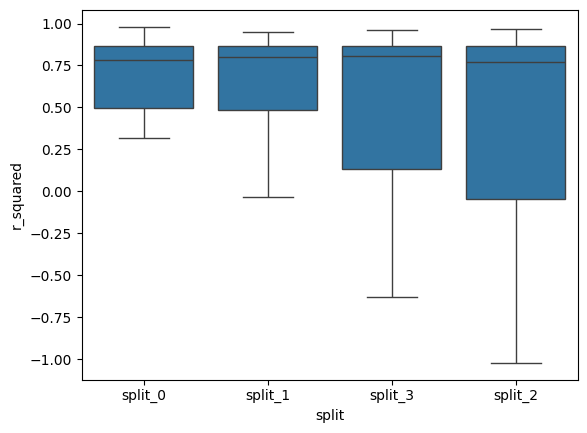

In [291]:
sns.boxplot(updated_metrics_stack, x="split", y="r_squared", showfliers=False)
plt.show()

In [292]:
updated_metrics_stack.drop(["gene","pathway"], axis=1).groupby("split").mean(0)

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd
split,,,,,,
split_0,-48.240764,9.676099,2.754096,2.373981,4.712403,0.032646
split_1,-53.798130,8.238761,2.017703,1.681867,3.331775,0.031337
split_2,-7.034007,9.341771,2.679421,2.299563,4.566806,0.037401
split_3,-17.394166,8.470691,2.316426,1.972485,3.909470,0.034257


In [293]:
updated_metrics_stack.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/satija/datasets/adata_ood_final_genes/gene_split.csv")

In [295]:
updated_metrics_stack

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,split,gene,pathway
pathway_gene,,,,,,,,,
IFNG_FBXO6,-2817.718236,0.964934,0.369478,0.335110,0.663462,0.048204,split_0,FBXO6,IFNG
IFNG_PIK3CA,-1691.913896,1.226190,0.687968,0.662193,1.319625,0.052912,split_1,PIK3CA,IFNG
TNFA_NFAT5,-429.685582,0.405583,0.233096,0.211238,0.419849,0.061451,split_1,NFAT5,TNFA
IFNB_IFI16,-273.516392,0.864137,0.620844,0.609568,1.216929,0.074335,split_3,IFI16,IFNB
IFNG_TAPBPL,-77.712259,0.142033,0.092079,0.089294,0.178005,0.084749,split_3,TAPBPL,IFNG
...,...,...,...,...,...,...,...,...,...
IFNB_DTX3L,0.906537,11.092487,1.301361,1.062843,2.107233,0.009627,split_2,DTX3L,IFNB
TNFA_CREB1,0.911799,9.858352,1.137585,0.911429,1.802384,0.009310,split_0,CREB1,TNFA
TGFB_EP300,0.916623,3.434990,0.859869,0.787544,1.566093,0.023474,split_3,EP300,TGFB
